<a href="https://colab.research.google.com/github/magnusaghe/ANA675/blob/main/Aghe_ANA675_Module3_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Magnus Aghe**

**Student ID: 900400010**

**Email: m.aghe0010@student.nu.edu**

**Course: ANA675 - MODULE 3 ASSIGNMENT**

In [1]:
import tensorflow as tf
from tensorflow import keras

**Load and Explore the Data**

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [76]:
(train_image, train_label) , (test_image, test_label) = tf.keras.datasets.cifar10.load_data()

Visualizing the data

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


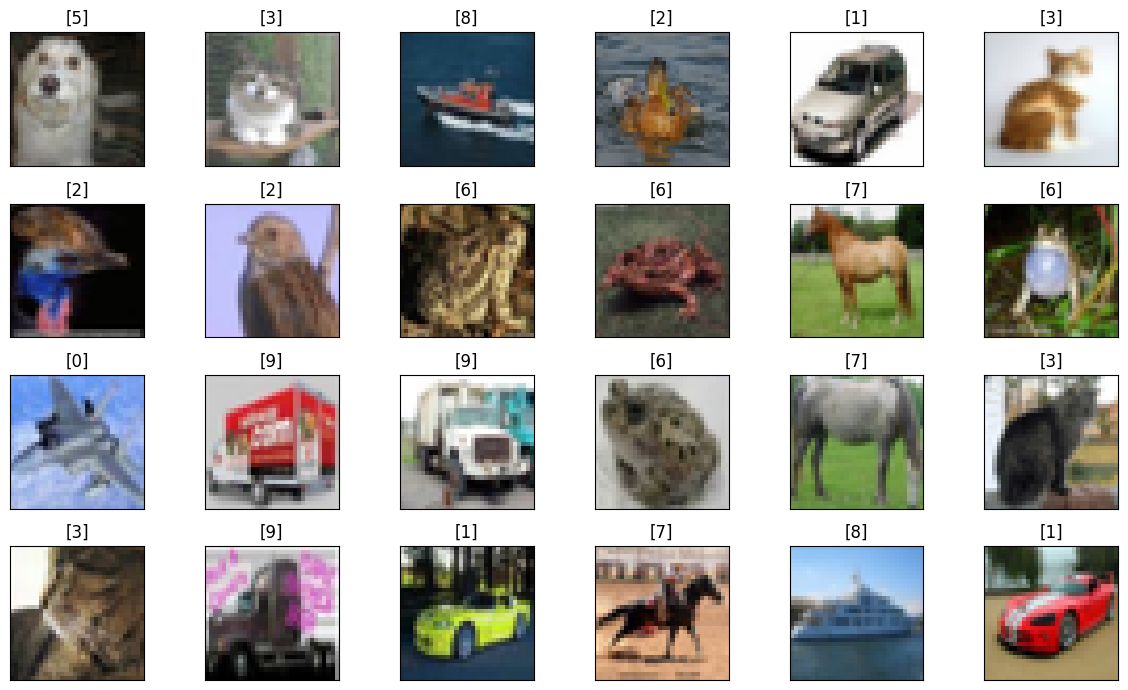

In [3]:
import matplotlib.pyplot as plt
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 7))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

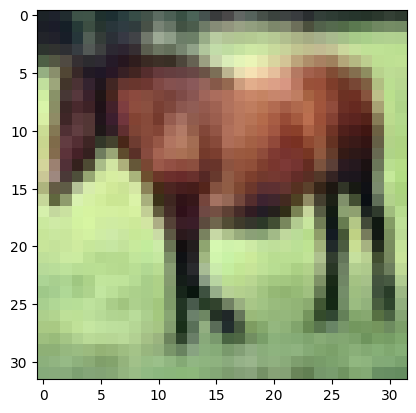

In [4]:
plt.imshow(X_train[7])  # matplotlib function imshow() creates an image from a 2-dimensional numpy array
plt.show()

In [73]:
import seaborn as sns

In [78]:
train_label = train_label.reshape(train_label.shape[0])
test_label = test_label.reshape(test_label.shape[0])

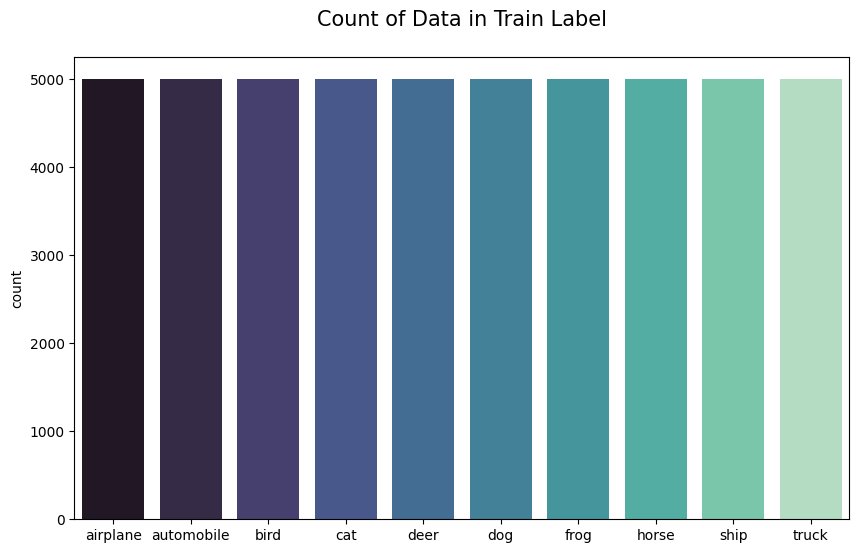

In [82]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize = (10,6))
plt.title("Count of Data in Train Label\n", size = 15)

sns.countplot(x = train_label, palette='mako').set(xticklabels = classes);

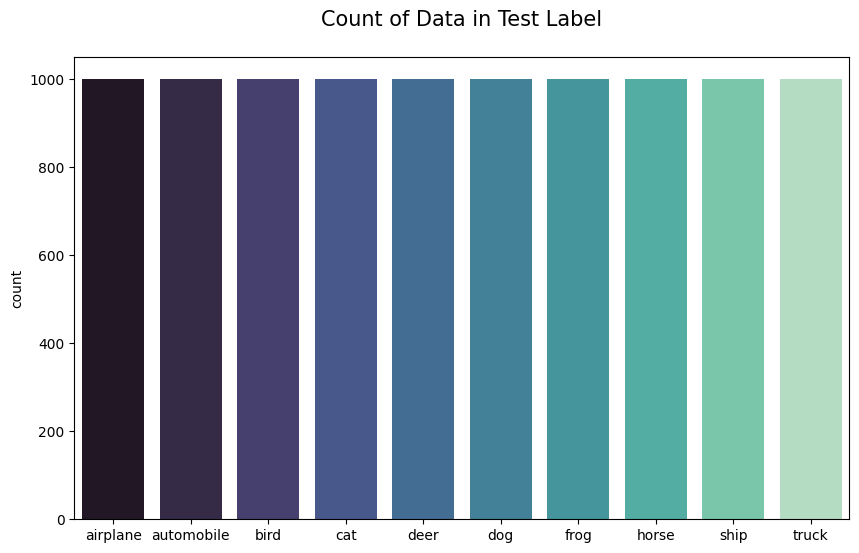

In [83]:
plt.figure(figsize = (10,6))
plt.title("Count of Data in Test Label\n", size = 15)

sns.countplot(x = test_label, palette='mako').set(xticklabels = classes);

**Splitting the data for training and testing**

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
y_test.shape

(10000, 1)

The cifar10 dataset contains 60,000 images split into 50,000 labeled images for training, and 10,000 images for testing.

Each image in the training and testing sets has 3 channels (colored - RGB) and 32 by 32 pixels i.e. 1,024 features.

The output y, has 1 channel.

In [11]:
# Reshaping the Image Data

X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
X_train = X_train.reshape((50000, 32, 32, 3))
X_train.shape

(50000, 32, 32, 3)

In [13]:
y_train[0]

array([6], dtype=uint8)

In [14]:
X_test = X_test.reshape((10000, 32, 32, 3))
X_test.shape

(10000, 32, 32, 3)

Normalizing the Image Data

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

**Training the model using simple Artificial Neural Network (ANN)**


Selecting and building the Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [19]:
model = Sequential()
model.add(Flatten(input_shape=[32, 32, 3]))
model.add(Dense(500, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 500)               1536500   
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,657,810
Trainable params: 1,657,810
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.layers

In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [23]:
hidden2 = model.layers[2]
hidden2.name

'dense_1'

In [24]:
hidden3 = model.layers[3]
hidden3.name

'dense_2'

In [25]:
weights, biases = hidden1.get_weights()

In [26]:
weights

array([[ 0.03067794,  0.02649456,  0.00476417, ...,  0.03548841,
        -0.03860042,  0.00207733],
       [ 0.0131758 ,  0.01535751,  0.00569876, ..., -0.02177247,
        -0.0144571 ,  0.011551  ],
       [-0.02944167, -0.03782438,  0.01222888, ..., -0.01962508,
        -0.03417904, -0.03691499],
       ...,
       [-0.02334153,  0.02425819,  0.01987303, ..., -0.00024075,
         0.00725497,  0.03940839],
       [-0.03867891, -0.01896212,  0.02210978, ..., -0.02404237,
        -0.02063938,  0.0054265 ],
       [ 0.0026622 , -0.01331891, -0.02021594, ...,  0.00530099,
        -0.0266145 ,  0.02484985]], dtype=float32)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

Training the ANN model

In [30]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size= 45)

Epoch 1/50
1000/1000 [==============================] - 34s 34ms/step - loss: 1.7369 - accuracy: 0.3732 - val_loss: 1.6888 - val_accuracy: 0.4006
Epoch 2/50
1000/1000 [==============================] - 33s 33ms/step - loss: 1.6352 - accuracy: 0.4104 - val_loss: 1.6097 - val_accuracy: 0.4270
Epoch 3/50
1000/1000 [==============================] - 31s 31ms/step - loss: 1.5708 - accuracy: 0.4384 - val_loss: 1.5930 - val_accuracy: 0.4278
Epoch 4/50
1000/1000 [==============================] - 33s 33ms/step - loss: 1.5231 - accuracy: 0.4530 - val_loss: 1.5228 - val_accuracy: 0.4630
Epoch 5/50
1000/1000 [==============================] - 32s 32ms/step - loss: 1.4857 - accuracy: 0.4682 - val_loss: 1.5119 - val_accuracy: 0.4570
Epoch 6/50
1000/1000 [==============================] - 31s 31ms/step - loss: 1.4519 - accuracy: 0.4784 - val_loss: 1.4953 - val_accuracy: 0.4766
Epoch 7/50
1000/1000 [==============================] - 31s 31ms/step - loss: 1.4232 - accuracy: 0.4924 - val_loss: 1.4805 -

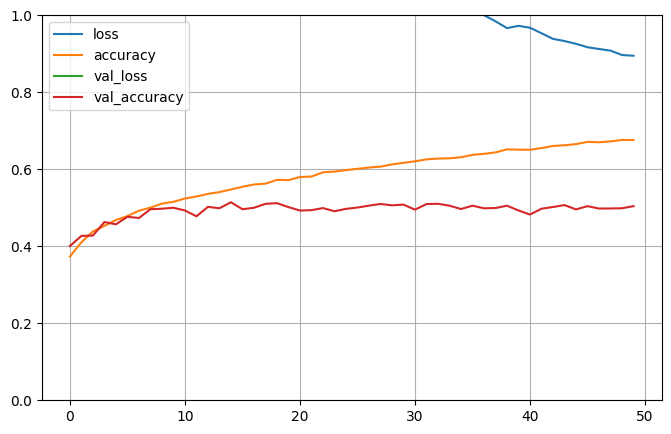

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Evaluating the ANN Model

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.6832 - accuracy: 0.4977


[1.683227777481079, 0.4977000057697296]

**Making Predictions**

In [41]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 29ms/step


array([[0.  , 0.07, 0.01, 0.3 , 0.02, 0.03, 0.  , 0.01, 0.46, 0.1 ],
       [0.  , 0.1 , 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.81, 0.08],
       [0.14, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.84, 0.  ]],
      dtype=float32)

In [42]:
y_new = y_test[:3]
y_new

array([[3],
       [8],
       [8]], dtype=uint8)

In [43]:
y_pred=np.argmax(model.predict(X_new), axis=1)  # axis = 1 return the Indices of Max element
y_pred

1/1 [==============================] - 0s 66ms/step


array([8, 8, 8])

**Evaluating the result**

In [45]:
print(y_proba[0])

[1.82950019e-03 7.09380731e-02 5.62853832e-03 3.02101851e-01
 1.53559288e-02 2.74547357e-02 2.89339951e-05 9.06854309e-03
 4.63757664e-01 1.03836276e-01]


In [46]:
for index, probability in enumerate(y_proba[0]):
    print(f'{index}: {probability:.10%}')

0: 0.1829500194%
1: 7.0938073099%
2: 0.5628538318%
3: 30.2101850510%
4: 1.5355928801%
5: 2.7454735711%
6: 0.0028933995%
7: 0.9068543091%
8: 46.3757663965%
9: 10.3836275637%


**The ANN model had a 67.5% accuracy on the training data, 50.4% accuracy on the validation set, and a 49.8% accuracy on the test set.**

**Training a CNN and checking the performance**

Selecting and Building the CNN Model

In [47]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [48]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D (pool_size=(2, 2)))   #None stride, it will default to pool_size
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

In [49]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

Visualizing the CNN Model's Sturcture

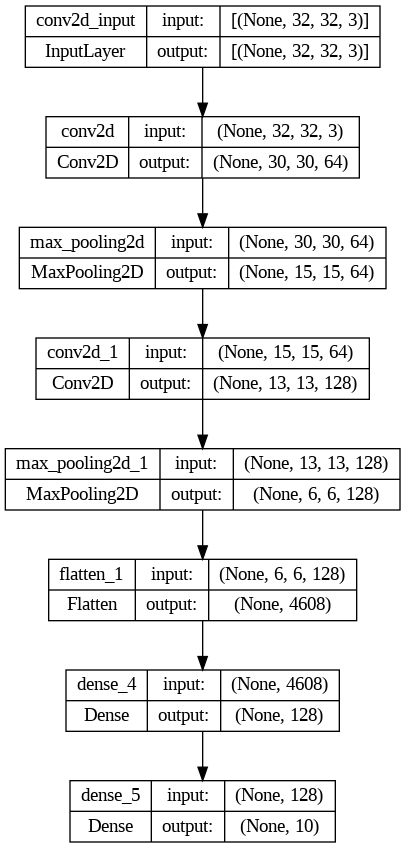

In [50]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

**Training the CNN Model**

In [55]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(50000, 10)

In [56]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [59]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [60]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
cnn.fit(X_train, y_train, epochs=50, batch_size=45, validation_split=0.1)

Epoch 1/50
1000/1000 [==============================] - 181s 180ms/step - loss: 0.4871 - accuracy: 0.8303 - val_loss: 0.8551 - val_accuracy: 0.7292
Epoch 2/50
1000/1000 [==============================] - 178s 178ms/step - loss: 0.4151 - accuracy: 0.8565 - val_loss: 0.9329 - val_accuracy: 0.7192
Epoch 3/50
1000/1000 [==============================] - 180s 180ms/step - loss: 0.3640 - accuracy: 0.8734 - val_loss: 0.9267 - val_accuracy: 0.7294
Epoch 4/50
1000/1000 [==============================] - 177s 177ms/step - loss: 0.3154 - accuracy: 0.8901 - val_loss: 1.0225 - val_accuracy: 0.7296
Epoch 5/50
1000/1000 [==============================] - 177s 177ms/step - loss: 0.2662 - accuracy: 0.9078 - val_loss: 1.0938 - val_accuracy: 0.7248
Epoch 6/50
1000/1000 [==============================] - 181s 181ms/step - loss: 0.2292 - accuracy: 0.9210 - val_loss: 1.1873 - val_accuracy: 0.7198
Epoch 7/50
1000/1000 [==============================] - 178s 179ms/step - loss: 0.1938 - accuracy: 0.9320 - val_

Evaluating the Model

In [63]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 13s 42ms/step - loss: 3.8165 - accuracy: 0.6804


In [64]:
accuracy

0.680400013923645

In [65]:
loss

3.8165230751037598

**Making Predictions on the CNN Model**

In [66]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 12s 38ms/step


In [67]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [68]:
y_new = y_test[:3]
y_new

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [85]:
y_new.argmax()

3

**Evaluating the result**

In [71]:
print(predictions[0])

[2.9344559e-24 8.2163619e-17 9.0303497e-13 9.9999994e-01 5.7773698e-14
 6.4384414e-13 1.8261410e-08 1.4516853e-25 8.9839141e-09 5.0166153e-21]


In [70]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000000%
1: 0.0000000000%
2: 0.0000000001%
3: 99.9999940395%
4: 0.0000000000%
5: 0.0000000001%
6: 0.0000018261%
7: 0.0000000000%
8: 0.0000008984%
9: 0.0000000000%


3 is Cat from our classification.

Checking whether our model predicts right or wrong:-

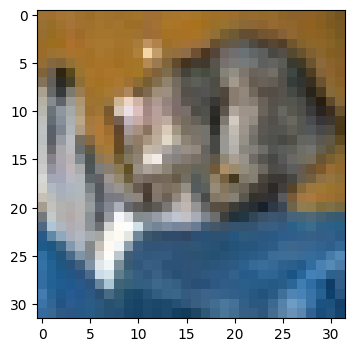

In [90]:
plt.figure(figsize = (8,4))

plt.imshow(test_image[0]);

Our model predicts correctly.

**Comparing the two models**

In [91]:
import pandas as pd

In [92]:
data = [['Training', '67.5%', '98.53%'], ['Validation', '50.4%', '70.00%'], ['Testing', '49.8%', '68.04%']]

df = pd.DataFrame(data, columns=['Accuracy', 'ANN Model', 'CNN Model'])

df

,Accuracy,ANN Model,CNN Model
0,Training,67.5%,98.53%
1,Validation,50.4%,70.00%
2,Testing,49.8%,68.04%


The CNN model had a 98.53% accuracy on the training data, 70% accuracy on the validation set, and a 68.04% accuracy on the test set.

This is a much better model than the ANN model which had a 67.5% accuracy on the training data, 50.4% accuracy on the validation set, and a 49.8% accuracy on the test set.